In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Tousif M Tamboli\Downloads\ai4i2020.csv")

In [5]:
missing_values = data.isnull().sum()
missing_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
data = pd.get_dummies(data, columns=['Type'], drop_first=True)

In [9]:
data.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False


In [10]:
#Normalize or standardize features
from sklearn.preprocessing import StandardScaler

#select features for scaling
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scalar = StandardScaler()

data[features] = scalar.fit_transform(data[features])

In [11]:
data.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,1,M14860,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,False,True
1,2,L47181,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,True,False
2,3,L47182,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,True,False
3,4,L47183,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,True,False
4,5,L47184,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,True,False


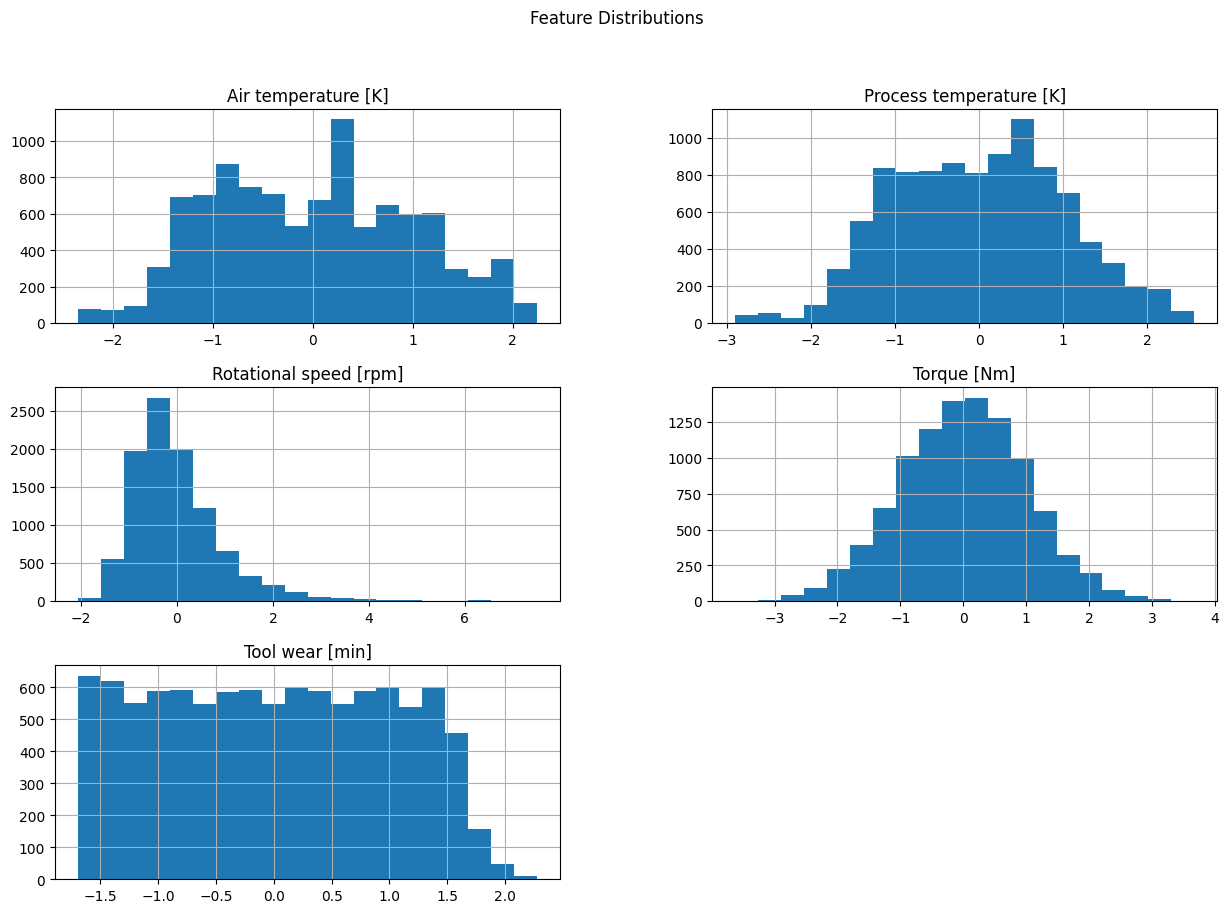

In [12]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#list of features to visualize
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

#plotting histograms
data[features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

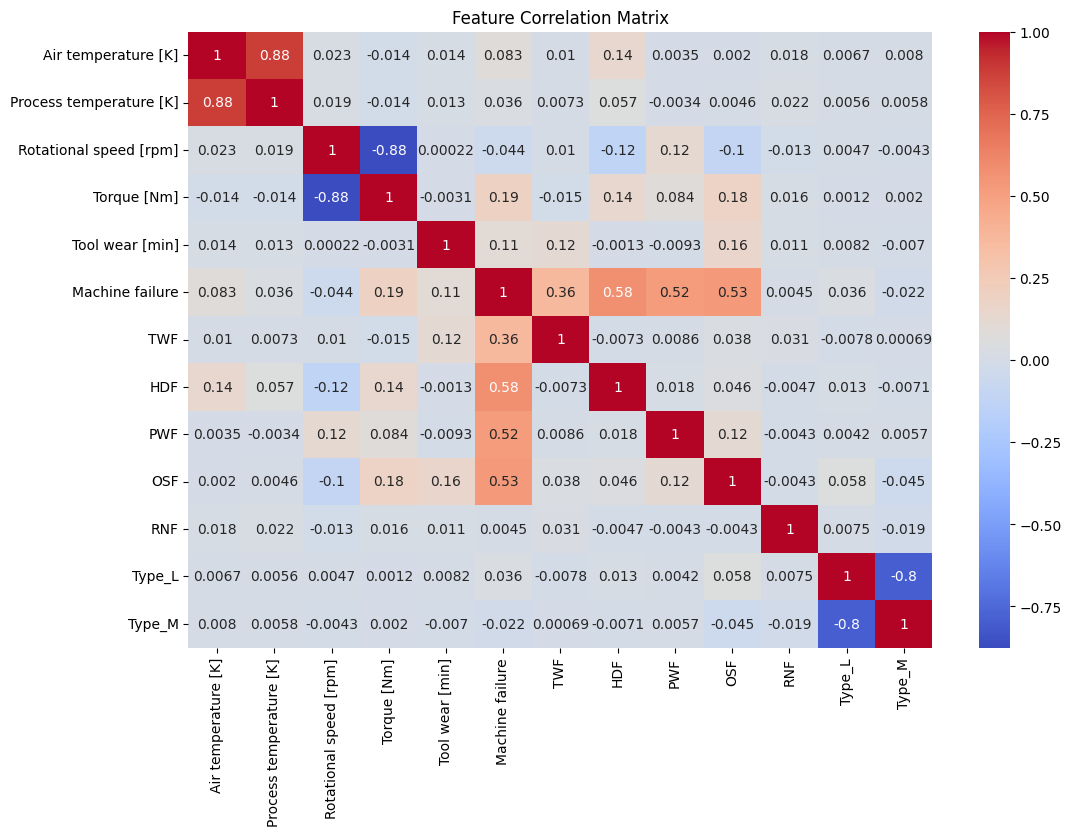

In [18]:
#drop non-numeric columns
numeric_data = data.drop(columns=['UDI', 'Product ID'])

#compute the correlation matrix
corr_matrix = numeric_data.corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

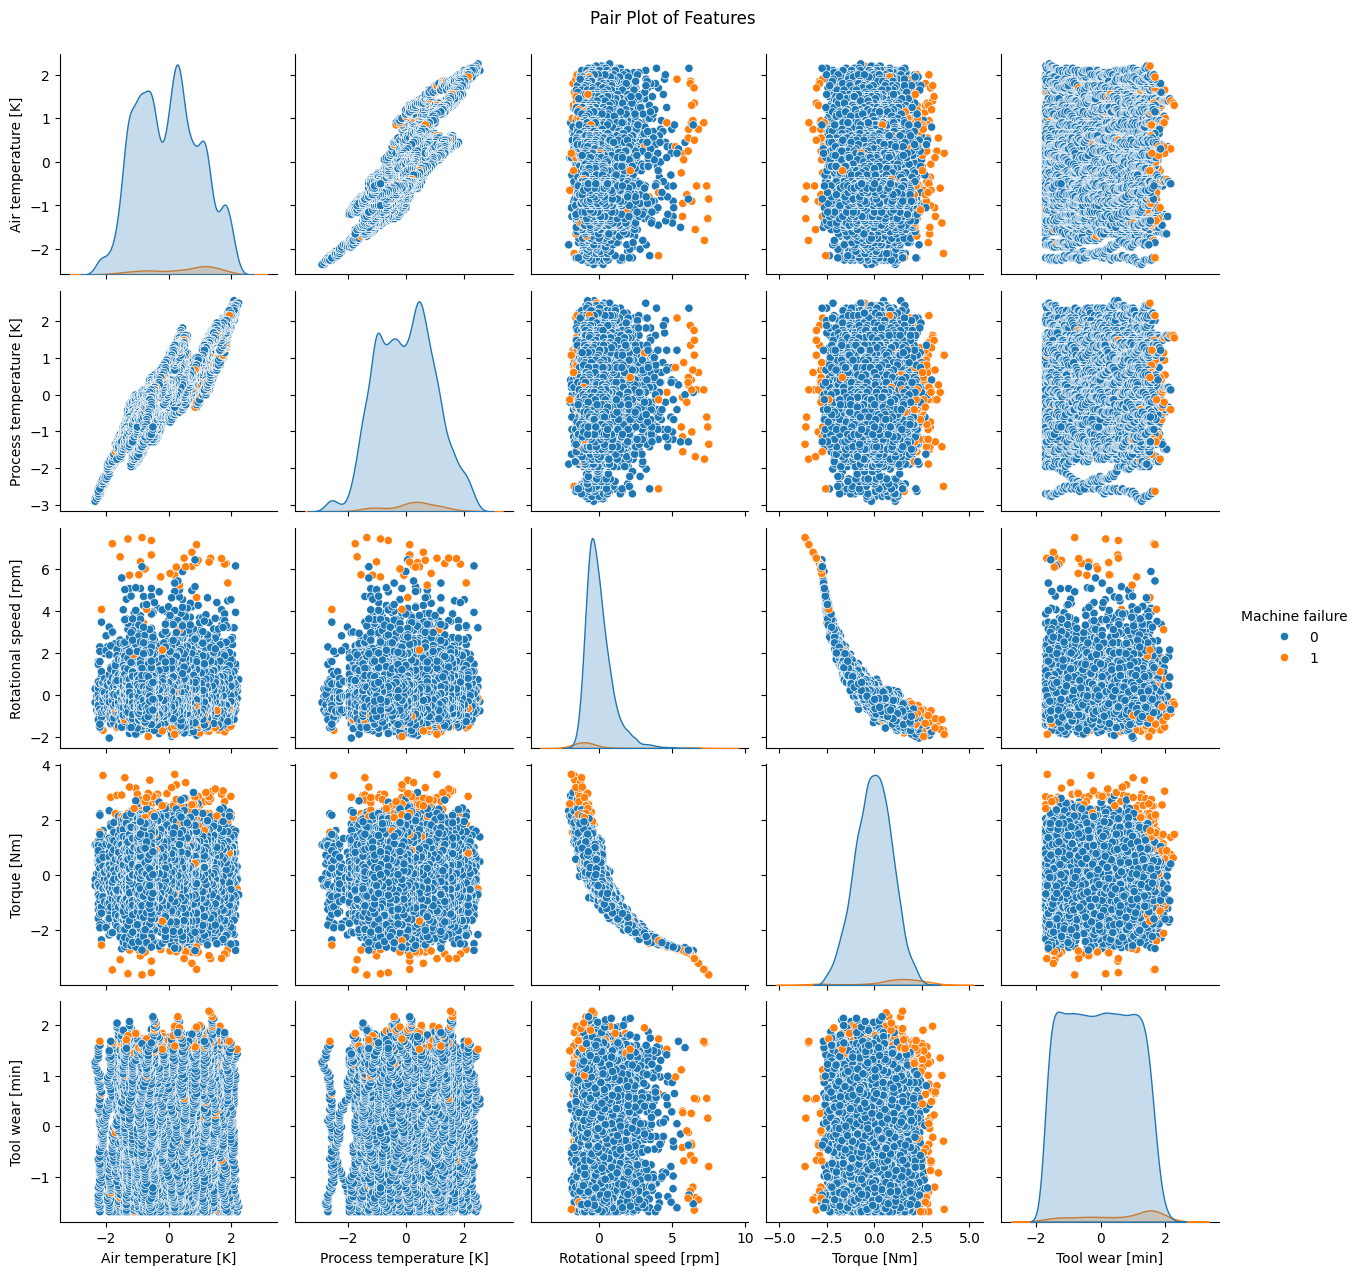

In [20]:
#Understand the Relationship Between Features and Machine Failure
#Pair Plot
sns.pairplot(data, hue='Machine failure', vars=features)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

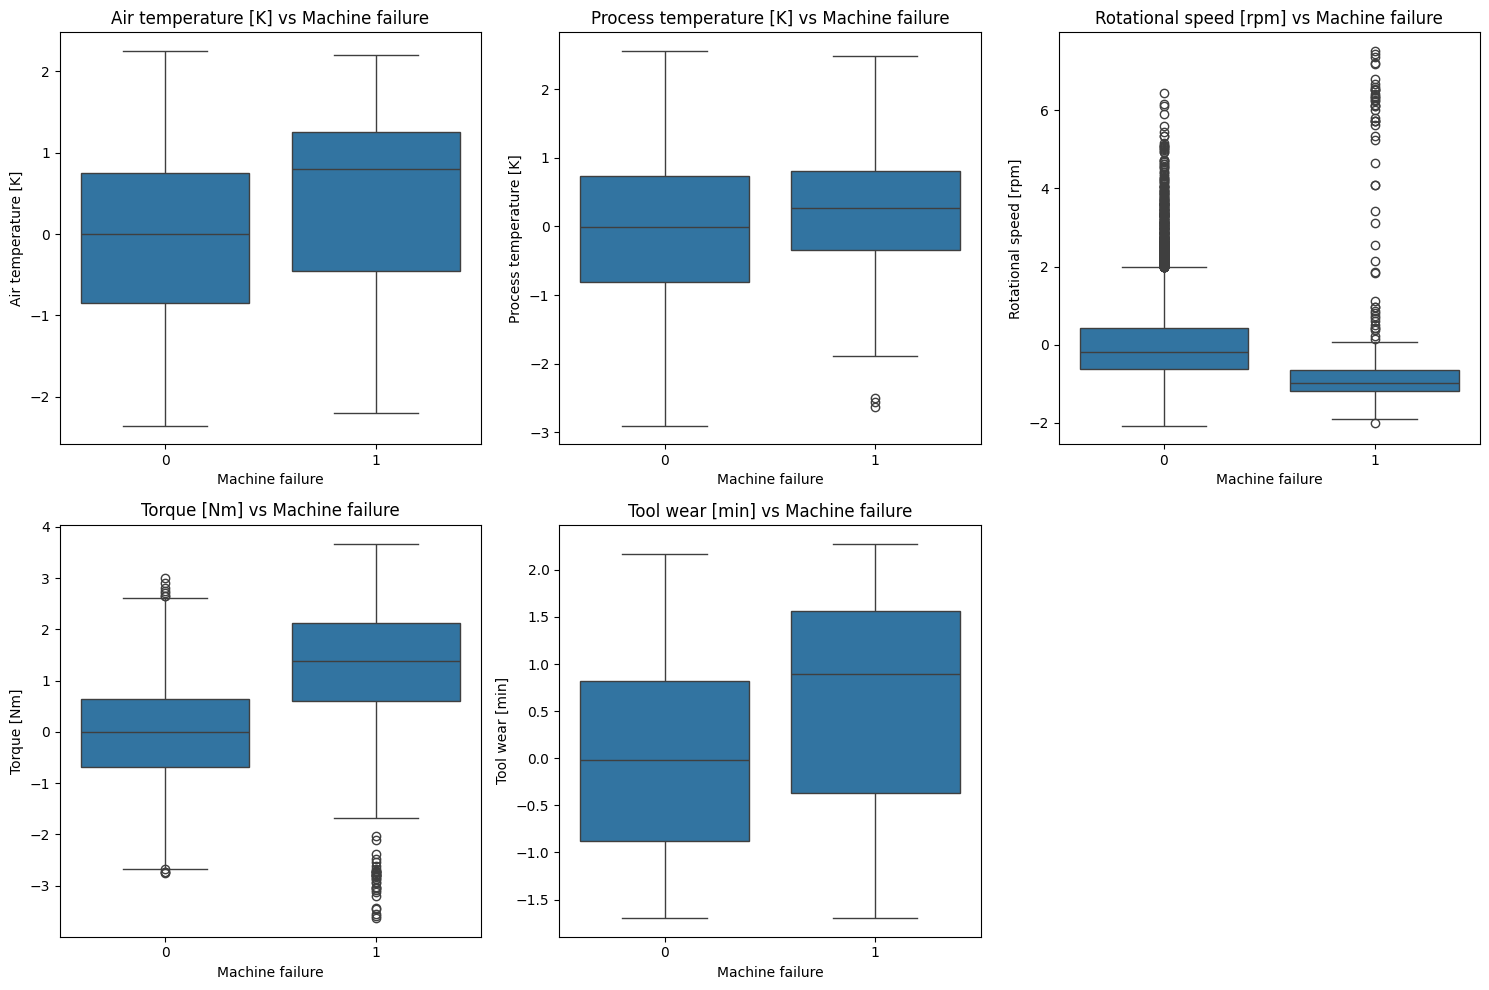

In [27]:
#Plot the boxplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Machine failure', y=feature, data=data)
    plt.title(f'{feature} vs Machine failure')
plt.tight_layout()
plt.show()

In [29]:
numeric_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,False,True
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,True,False
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,True,False
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,True,False
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,True,False


In [30]:
#Feature Engineering
data['Temprature_Product'] = data['Air temperature [K]'] * data['Process temperature [K]']

In [33]:
#scikit-learn for preprocessing:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(interaction_only=True, include_bias=False)
interactions = pd.DataFrame(poly.fit_transform(data[['Air temperature [K]', 'Process temperature [K]']]),
                           columns = poly.get_feature_names_out(['Air temperature [K]', 'Process temperature [K]']))

data = pd.concat([data, interactions], axis=1)

In [35]:
corr_matrix

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688,0.006676,0.007958
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279,0.005564,0.005831
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088,0.004735,-0.004296
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136,0.001191,0.001991
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326,0.008232,-0.006976
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516,0.035643,-0.022432
TWF,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970,-0.007843,0.000690
HDF,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706,0.013402,-0.007095
PWF,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273,0.004209,0.005690
OSF,0.001988,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341,0.058434,-0.045138


In [38]:
#Feature Selection
#Correlation Analysis
# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# If there are non-numeric columns, handle them appropriately (e.g., encode categorical variables)
# For example, using one-hot encoding:
data_encoded = pd.get_dummies(data.drop(non_numeric_columns, axis=1))

# Now, compute correlation matrix and select relevant features
corr_matrix = data_encoded.corr()
corr_with_target = corr_matrix['Machine failure'].abs().sort_values(ascending=False)
relevant_features = corr_with_target[corr_with_target > 0.1].index

In [40]:
# Example of handling non-numeric data assuming 'data' is your DataFrame
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Convert non-numeric columns using label encoding
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Drop the target variable from X and assign it to y
X = data.drop(['Machine failure'], axis=1)
y = data['Machine failure']

# Now, retry training the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

# After fitting, you can proceed to analyze feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
relevant_features = feature_importances.sort_values(ascending=False).head(5).index


In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data.drop(['Machine failure'], axis=1)
y = data['Machine failure']

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(X, y)

relevant_features = X.columns[selector.support_]


C:\Users\Tousif M Tamboli\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tousif M Tamboli\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [44]:
#Model Development
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[relevant_features], y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Neural Network' : MLPClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")

Model: Logistic Regression
Accuracy: 1.00, Precision: 1.00, Recall: 0.97, F1 Score: 0.98, ROC-AUC: 0.98
Model: Random Forest
Accuracy: 1.00, Precision: 1.00, Recall: 0.97, F1 Score: 0.98, ROC-AUC: 0.98
Model: Gradient Boosting
Accuracy: 1.00, Precision: 1.00, Recall: 0.97, F1 Score: 0.98, ROC-AUC: 0.98
Model: Neural Network
Accuracy: 1.00, Precision: 1.00, Recall: 0.97, F1 Score: 0.98, ROC-AUC: 0.98


In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

for model_name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X[relevant_features], y, cv=5, scoring='accuracy')
    print(f"Cross-validated Accuracy for {model_name}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    # Confusion matrix
    y_pred_cv = cross_val_predict(model, X[relevant_features], y, cv=5)
    cm = confusion_matrix(y, y_pred_cv)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

Cross-validated Accuracy for Logistic Regression: 1.00 (+/- 0.00)
Confusion Matrix for Logistic Regression:
[[9661    0]
 [   9  330]]
Cross-validated Accuracy for Random Forest: 1.00 (+/- 0.00)
Confusion Matrix for Random Forest:
[[9661    0]
 [   9  330]]
Cross-validated Accuracy for Gradient Boosting: 1.00 (+/- 0.00)
Confusion Matrix for Gradient Boosting:
[[9661    0]
 [   9  330]]
Cross-validated Accuracy for Neural Network: 1.00 (+/- 0.00)
Confusion Matrix for Neural Network:
[[9661    0]
 [   9  330]]
